<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЗАДАНИЕ 1**

В случае критической клинической ситуации при подорении диагноза пневмоторакс, будет использоваться алгоритмом детекции. Этот алгоритм будет анализировать медицинские снимки и определять наличие признаков пневмоторакса.

После того как снимки загружены в систему PACS, они могут автоматически проходить через этот алгоритм,коорый  обнаруживает признаки пневмоторакса и может немедленно отправить уведомление персоналу больницы. Это позволит врачу быстрее определить, есть ли у пациента угрожающее жизни состояние и на сколько срочно необходимо вмешательство.

**ЗАДАНИЕ 2**

В данном исследовании будет содержаться три серии DICOM: одна для каждой из перечисленных рентгенограмм, те каждая серия будет включать в себя один снимок.


**ЗАДАНИЕ 3**

- ID пациента - Да
- Заключение врача-рентгенолога - Нет (хранятся в отчете)
- Исследуемая часть тела - Да
- Тип модальности исследования - Да (рентген, КТ)
- Производитель оборудования - Да
- Результаты биопсии - Нет

**ЗАДАНИЕ 4**


Больница “Y” обладает информацией, что у Ивана Ивановича перелом нога, тк получили полное DICOM-исследование и заключение врача лучевой диагностики.

Больница 'Y' не обладают информацией о результатах анализов крови, мочи, других исследованиях, так как они не были направлены в больницу “Y”. И остались в выписке ИИ и в истории болени в больнице 'X'.

Также больнице 'Y' неизвестно, что у ИИ был гипертонический криз, т.к. эта информация известна врачу скорой помощи и врачам больницы “X”, информация будет в выписке и в истории болезни.

ИИ необходимо при сеье при поступлении иметь выписку, где будет результаты анализов, исследований, заболеваний, анамнез, когда он отправится в больницу “Y”.

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.io import imread, imshow
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import cv2

%matplotlib notebook
%matplotlib inline

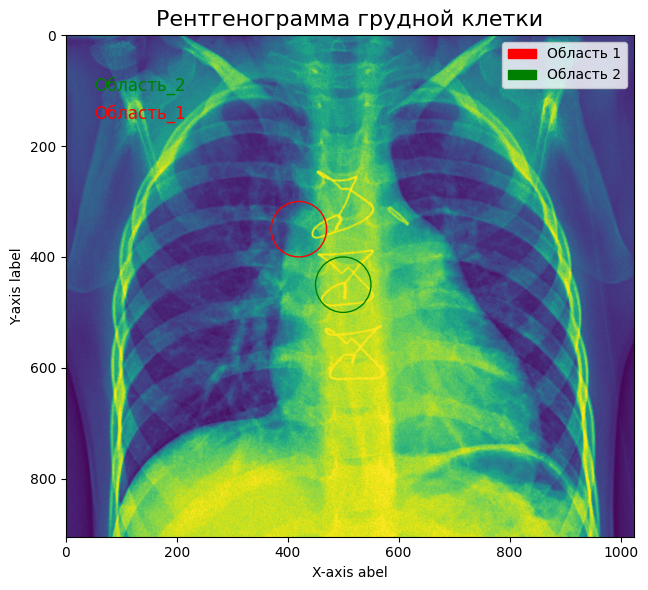

In [33]:
chest_xray_1 = imread('/content/D-IpU8-XoAI-Q7Q.jpg')
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(chest_xray_1)
ax.set_title('Рентгенограмма грудной клетки', fontsize=16)
ax.axis('on')
ax.set_xlabel('X-axis abel')
ax.set_ylabel('Y-axis label')


# Выделение интересующей области
circle = plt.Circle((420, 350), 50, fill=False, color='red')
fig.gca().add_artist(circle)

circle = plt.Circle((500, 450), 50, fill=False, color='green')
fig.gca().add_artist(circle)

# Описание интересующей области
ax.text(50, 150, 'Область_1', color='red', fontsize=12)
ax.text(50, 100, 'Область_2', color='green', fontsize=12)

# Создаем список объектов для легенды
colors = ['red', 'green']
labels = ['Область 1', 'Область 2']
legends = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
ax.legend(handles=legends)

plt.tight_layout()
plt.show()

In [34]:
# Читаем изображение как чёрно-белое
cb_img = cv2.imread("/content/D-IpU8-XoAI-Q7Q.jpg",0)
print(cb_img)

[[93 95 97 ... 64 64 64]
 [86 88 90 ... 64 64 64]
 [80 81 83 ... 64 64 64]
 ...
 [53 54 54 ... 53 54 55]
 [53 54 54 ... 53 55 55]
 [55 55 54 ... 52 53 55]]


In [35]:
print("Высота:" + str(cb_img.shape[0]))
print("Ширина:" + str(cb_img.shape[1]))

Высота:905
Ширина:1024


In [36]:
print("Размер ", cb_img.shape)

Размер  (905, 1024)


In [37]:
print("Data type of image is ", cb_img.dtype)

Data type of image is  uint8


Координаты  участков изображения, содержащих легкие, сердце и кости:

In [48]:
# легкие:
lung_x = [150,300]
lung_y = [400,750]

#сердце
heart_x = [550,750]
heart_y = [500,700]

#кости
bone_x = [500,550]
bone_y = [500,550]



In [44]:
## Координаты опухоли:
lung_left_x = [150,300]
lung_left_y = [250,350]

In [42]:
def plot_rectangle(ax, xcoords, y_coords, color):
    square = patches.Rectangle((xcoords[0], y_coords[0]), xcoords[1]-xcoords[0], y_coords[1]-y_coords[0], edgecolor=color, facecolor='none')
    ax.add_patch(square)

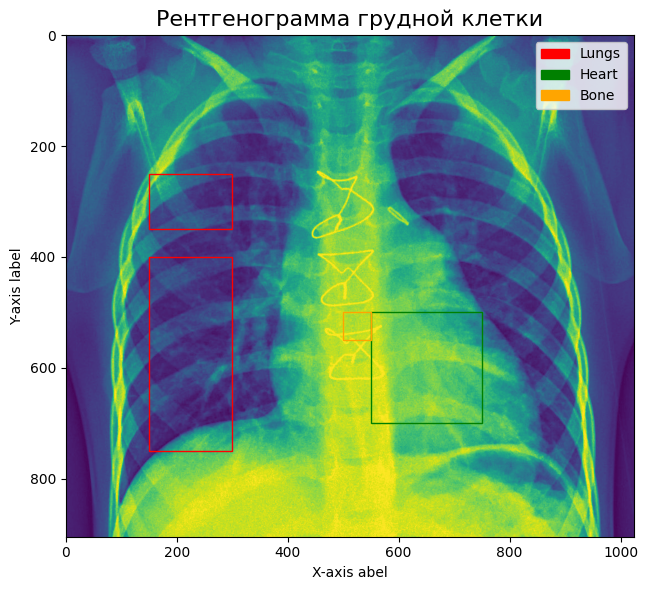

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(chest_xray_1)
ax.set_title('Рентгенограмма грудной клетки', fontsize=16)
ax.axis('on')
ax.set_xlabel('X-axis abel')
ax.set_ylabel('Y-axis label')

# Выделение интересующей области
plot_rectangle(ax, lung_x, lung_y, 'red')
plot_rectangle(ax, lung_left_x, lung_left_y, 'red')
plot_rectangle(ax, heart_x, heart_y, 'green')
plot_rectangle(ax, bone_x, bone_y, 'orange')

# Создаем список объектов для легенды
colors = ['red', 'green', 'orange']
labels = ['Lungs', 'Heart', 'Bone']
legends = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
ax.legend(handles=legends)

plt.tight_layout()
plt.show()

 График интенсивности пикселей для выбранных вами областей

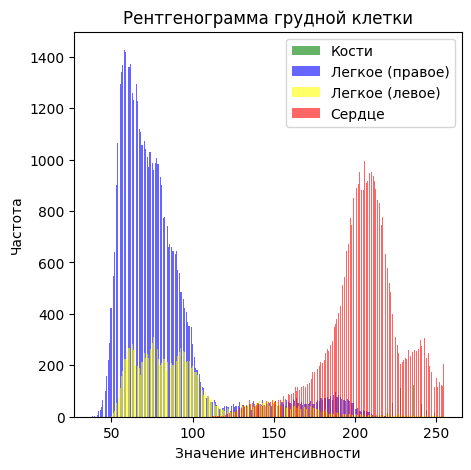

In [50]:
# Создаем фигуру и оси с заданными размерами
fig, ax = plt.subplots(figsize=(5, 5))

# Рисуем гистограммы
ax.hist(chest_xray_1[bone_y[0]:bone_y[1], bone_x[0]:bone_x[1]].ravel(), bins=256, color='green', alpha=0.6)
ax.hist(chest_xray_1[lung_y[0]:lung_y[1], lung_x[0]:lung_x[1]].ravel(), bins=256, color='blue', alpha=0.6)
ax.hist(chest_xray_1[lung_left_y[0]:lung_left_y[1], lung_left_x[0]:lung_left_x[1]].ravel(), bins=256, color='yellow', alpha=0.6)
ax.hist(chest_xray_1[heart_y[0]:heart_y[1], heart_x[0]:heart_x[1]].ravel(), bins=256, color='red', alpha=0.6)

# Добавляем легенду
ax.legend(['Кости', 'Легкое (правое)', 'Легкое (левое)', 'Сердце'])

# Настраиваем подписи и заголовок
ax.set_xlabel('Значение интенсивности')
ax.set_ylabel('Частота')
ax.set_title('Рентгенограмма грудной клетки')

plt.show()

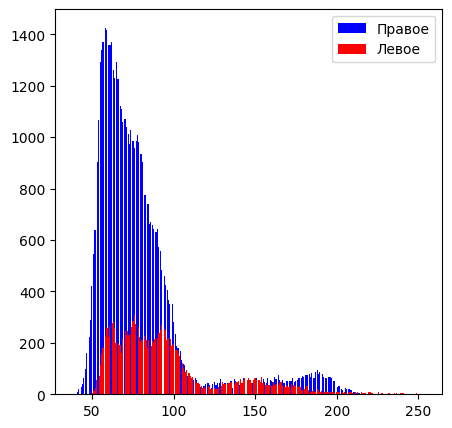

In [51]:
plt.figure(figsize=(5,5))
plt.hist(chest_xray_1[lung_y[0]:lung_y[1],lung_x[0]:lung_x[1]].ravel(),bins =256,color='blue')
plt.hist(chest_xray_1[lung_left_y[0]:lung_left_y[1],lung_left_x[0]:lung_left_x[1]].ravel(),bins=256,color='red')
plt.legend(['Правое', 'Левое'])
plt.show()

In [52]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00


In [53]:
import pydicom

In [60]:
dcm = pydicom.dcmread("/content/0120.dcm")

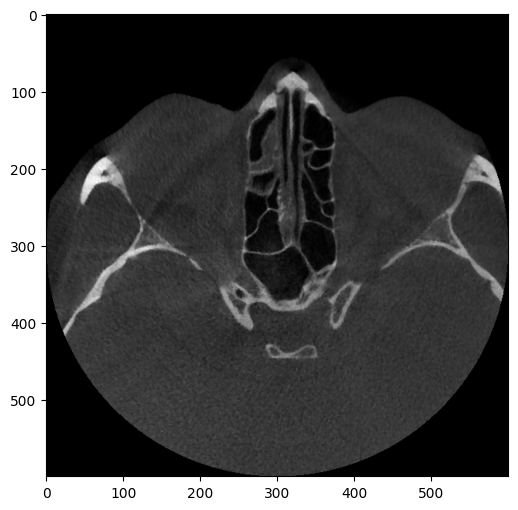

In [61]:
# Визуализация изображения с помощью plt.imshow

plt.figure(figsize=(8, 6))
plt.imshow(dcm.pixel_array,cmap='gray')

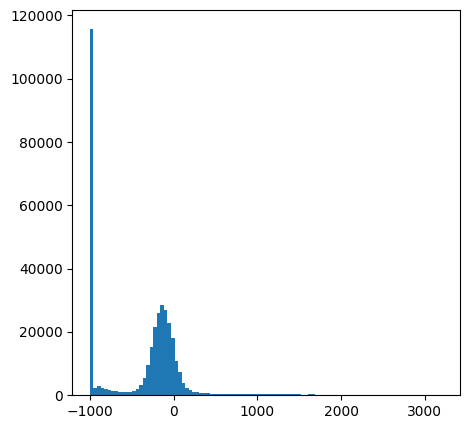

In [62]:
# Отображаем гистограмму значений интенсивности пикселей изображения

plt.figure(figsize=(5,5))
plt.hist(dcm.pixel_array.ravel(), bins = 100)
plt.show()

In [65]:
# среднее и среднеквадратичное значения интенсивности изображения.

mean_intensity = np.mean(dcm.pixel_array)
mean_intensity

-382.0612777777778

In [64]:
std_intensity = np.std(dcm.pixel_array)
std_intensity

550.0974229277034

In [66]:
## Гистограмму нормализованных значений интенсивности

new_img = dcm.pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity

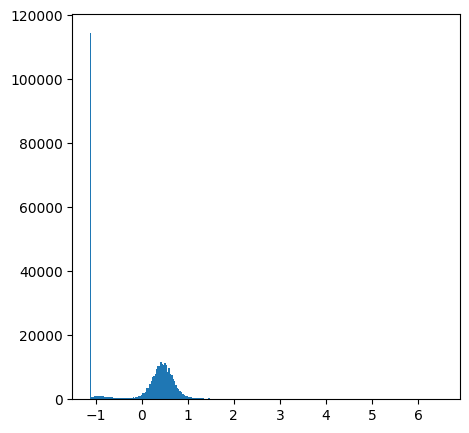

In [67]:

plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)
plt.show()

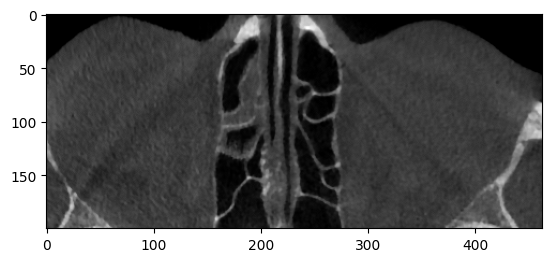

In [68]:
plt.imshow(dcm.pixel_array[100:(100+200),100:(100+463)],cmap='gray')

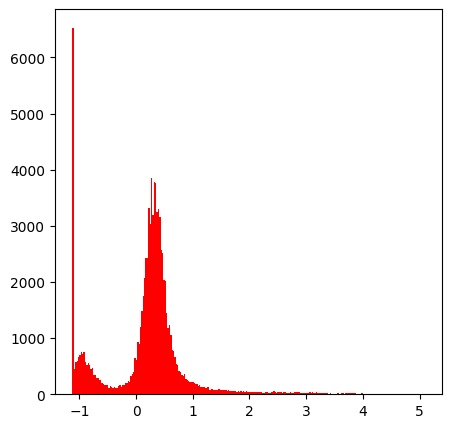

In [69]:
# Гистограмму нормализованных значений интенсивности
plt.figure(figsize=(5,5))
plt.hist(new_img[100:(100+200),100:(100+463)].ravel(), bins = 256,color='red')
plt.show()